# Description of this program
## Read the oversampled data and then project the data in a new dimension. Used the projected data to train a ML model
## Verify correctness of the trained model by test data (project the test data by using same random matrices)

In [1]:
#Read all oversample data
import csv
import pandas as pd
dataset=pd.read_csv('Dataset/OversampledSwipeData.csv',index_col=0)
#testdataset=pd.read_csv('Dataset/SwipeDatatest.csv',index_col=0)
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,Label
0,0.052478,0.277631,0.451259,0.718039,0.462785,0.0,0.0,0.018702,0.167556,-0.021220,...,-0.000286,0.006156,0.000038,0.098039,0.175416,0.183196,0.083857,0.007032,0.183644,0
1,0.052112,0.329417,0.456423,0.707689,0.431129,0.0,0.0,0.018824,0.188321,-0.046427,...,-0.001681,0.006563,0.000043,0.172549,0.161923,0.174437,0.012390,0.000154,0.172166,0
2,0.044798,0.246703,0.482247,0.682013,0.413386,0.0,0.0,0.023549,0.219466,-0.084152,...,-0.003980,0.007612,0.000058,0.172549,0.165296,0.176905,0.015824,0.000250,0.179818,0
3,0.050101,0.292016,0.470626,0.711022,0.418269,0.0,0.0,0.019350,0.182533,-0.089321,...,0.000438,0.009006,0.000081,0.149020,0.165296,0.178174,0.036672,0.001343,0.183644,0
4,0.048638,0.282665,0.438347,0.712347,0.447676,0.0,0.0,0.023968,0.151995,-0.024688,...,-0.001410,0.007316,0.000054,0.125490,0.175416,0.184353,0.061493,0.003786,0.183644,0


In [2]:
#replace the user ID by class name and count the number of sample in each class
#dataset['Label'] = pd.factorize(dataset['Label'])[0]
dataset.groupby(['Label'])['Label'].count()

Label
0     300
1     300
2     300
3     300
4     300
     ... 
81    300
82    300
83    300
84    300
85    300
Name: Label, Length: 86, dtype: int64

In [3]:
#seperate the profile in two groups (80.0%, 20.0%): (i) Training profile (0-155), and (ii) auxiliary profile (156-192)
totalUser= len(pd.unique(dataset['Label']))
trainingData = dataset[dataset['Label'] <68]
auxilaryData = dataset[dataset['Label'] >= 68]
print("Total user in training dataset:", len(pd.unique(trainingData['Label'])))
print("Total user in auxiliary dataset:", len(pd.unique(auxilaryData['Label'])))
#assigned 0-154 users' data to dataset
dataset=trainingData

Total user in training dataset: 68
Total user in auxiliary dataset: 18


In [4]:
#total use in the system
totalUser= len(pd.unique(dataset['Label']))
trainingData=dataset
print("Total user in the training dataset:", len(pd.unique(trainingData['Label'])))

Total user in the training dataset: 68


In [5]:
column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30','Label']
column2=column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30']
datasetRP = pd.DataFrame(columns=column1)
from sklearn.random_projection import SparseRandomProjection

import numpy as np
for seed in range(0,68):
    rng = np.random.RandomState(seed)
    X = dataset[dataset['Label']==seed]
    transformer = SparseRandomProjection(n_components=30, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['Label']=seed
    datasetRP = pd.concat([datasetRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(dataset.shape)
print(datasetRP.shape)


C:\Users\mdmor\AppData\Local\Temp\ipykernel_24672\2213213074.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  datasetRP = pd.concat([datasetRP, XRP], ignore_index=True)


(20400, 34)
(20400, 31)


In [6]:
#total use in the system
totalUser= len(pd.unique(datasetRP['Label']))
trainingData=datasetRP
print("Total user in the training dataset:", len(pd.unique(trainingData['Label'])))

Total user in the training dataset: 68


In [7]:
#Prepare the traning data for training and testing the model
import tensorflow
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X=trainingData.drop(columns=['Label'])
y=trainingData['Label']

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=22)
#Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=22)

ytrain = to_categorical(ytrain)
yval = to_categorical(yval)
#ytest = to_categorical(ytest)

In [8]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xval.shape)
print(yval.shape)
#print(Xtest.shape)
#print(ytest.shape)

(16320, 30)
(16320, 68)
(4080, 30)
(4080, 68)


In [9]:
# import all necessary package for a neural network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inlineimport keras
from keras.layers import Dense, Dropout, Input,Activation,Dropout, Flatten
from keras.models import Model,Sequential
from keras.datasets import mnist
#from tqdm import tqdm
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization
from keras.optimizers import Adam
#import torch.nn.functional as F

In [10]:
#define optimizers for neural network
from keras.optimizers import SGD, RMSprop, Adam
def adam_optimizer():
    return Adam(learning_rate=0.0002, beta_1=0.5)

def RMSprop_optimizer():
    return RMSprop(learning_rate=0.001, rho=0.9)

In [11]:
#neural network architecture for model training

def create_classifierRP(release=False,totalClass=68):
  classifier = Sequential()
  classifier.add(Dense(64, input_dim=30))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.5))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(128))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.2))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))
  #classifier.add(Dropout(0.2))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(64))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.2))

  #if release:
  classifier.add(Dense(totalClass, activation='softmax'))
  #else:
  #   classifier.add(Dense(Tuser))
  #np.log_softmax_v2(a, axis=axis)
  #classifier.add(F.softmax(a, dim=1))

  classifier.compile(loss='categorical_crossentropy', optimizer=RMSprop_optimizer(),metrics=['accuracy'])
  return classifier

Clasf=create_classifierRP()
Clasf.summary()

C:\Users\mdmor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 68)             │         4,420 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,004 (93.77 KB)

 Trainable params: 23,492 (91.77 KB)

 Non-trainable params: 512 (2.00 KB)

In [12]:
#Train the classifier seperately for black-box attack
import keras

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.5,min_lr=0.0001)
callbacks_list = [learning_rate_reduction]

Classfier2= create_classifierRP(True,68)

#------Comment will start from here
lossc='categorical_crossentropy'
optimizerc=RMSprop(learning_rate=0.001, rho=0.9)
Classfier2.compile(loss=lossc, optimizer=optimizerc,metrics=['accuracy'])
#------Comments will end from here
historyc2 =  Classfier2.fit(Xtrain, ytrain, batch_size=64, epochs=20, validation_data=(Xval, yval),verbose=1)

Epoch 1/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2696 - loss: 3.3339 - val_accuracy: 0.9968 - val_loss: 1.3918
Epoch 2/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8217 - loss: 1.0523 - val_accuracy: 0.9993 - val_loss: 0.0586
Epoch 3/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8940 - loss: 0.4702 - val_accuracy: 0.9993 - val_loss: 0.0097
Epoch 4/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9182 - loss: 0.3202 - val_accuracy: 0.9993 - val_loss: 0.0046
Epoch 5/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9288 - loss: 0.2646 - val_accuracy: 0.9995 - val_loss: 0.0033
Epoch 6/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9385 - loss: 0.2153 - val_accuracy: 0.9995 - val_loss: 0.0028
Epoch 7/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9448 - loss: 0.1904 - val_accuracy: 0.9995 - val_loss: 0.0026
Epoch 8/20
255/255 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9459 - loss: 0.1870 - val_accuracy: 0.

Text(0.5, 0, 'epochs')

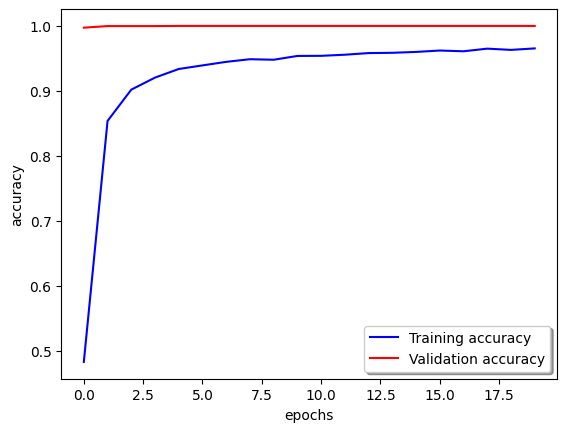

In [13]:
# Plot the classifier loss and accuracy curves for training and validation data
import matplotlib.pyplot as plt
plt.plot(historyc2.history['accuracy'], color='b', label="Training accuracy")
plt.plot(historyc2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.ylabel('accuracy')
plt.xlabel('epochs')

In [14]:
#read the test data and seperate test data
import csv
import pandas as pd
testdataset=pd.read_csv('Dataset/SwipeDatatest.csv',index_col=0)
testdataset = testdataset[testdataset['Label'] < 68]
#testdataset.head()

In [15]:
#random project the test data by using same random matrix
column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30','Label']
column2=column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30']
testdatasetRP = pd.DataFrame(columns=column1)
from sklearn.random_projection import SparseRandomProjection

import numpy as np
for seed in range(0,68):
    rng = np.random.RandomState(seed)
    X = testdataset[testdataset['Label']==seed]
    transformer = SparseRandomProjection(n_components=30, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['Label']=seed
    testdatasetRP = pd.concat([testdatasetRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(testdataset.shape)
print(testdatasetRP.shape)

C:\Users\mdmor\AppData\Local\Temp\ipykernel_24672\652946025.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  testdatasetRP = pd.concat([testdatasetRP, XRP], ignore_index=True)


(1639, 34)
(1639, 31)


In [16]:
Xtest=testdatasetRP.drop(columns=['Label'])
ytest=testdatasetRP['Label']
ytest = to_categorical(ytest)

In [17]:
#Performance of the classifier
Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier2.evaluate(Xtest, ytest)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9987 - loss: 0.0034     
Loss: 0.0015382273122668266
Accuracy: 0.9993898868560791
